In [3]:
#!pip --version
#!pip install --upgrade tensorflow
!conda install tensorflow

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-64::daal4py==2021.3.0=py39h01d92e1_0
  - defaults/noarch::jupyterlab_server==2.8.2=pyhd3eb1b0_0
  - defaults/osx-64::scipy==1.7.1=py39h88652d9_2
  - defaults/noarch::imageio==2.9.0=pyhd3eb1b0_0
  - defaults/osx-64::numba==0.54.1=py39hae1ba45_0
  - defaults/osx-64::jupyter==1.0.0=py39hecd8cb5_7
  - defaults/osx-64::bottleneck==1.3.2=py39he3068b8_1
  - defaults/osx-64::mkl_random==1.2.2=py39hb2f4e1b_0
  - defaults/osx-64::patsy==0.5.2=py39hecd8cb5_0
  - defaults/osx-64::nbconvert==6.1.0=py39hecd8cb5_0
  - defaults/osx-64::imagecodecs==2021.8.26=py39ha952a84_0
  - defaults/osx-64::bkcharts==0.2=py39hecd8cb5_0
  - defaults/osx-64::ipykernel==6.4.1=py39hecd8cb5_1
  - defaults/noarch::nbclassic==0.2.6=pyhd3eb1b0_0
  - defaults/osx-64::matplotlib-base==3.4.3=py39h0a11d32_0
 

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/fenago/datasets/main/data.csv')
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1788,2014-06-03 00:00:00,640000.0,3.0,2.50,2370,11172,2.0,0,0,3,2370,0,1993,0,12020 SE 76th St,Newcastle,WA 98056,USA
3045,2014-06-23 00:00:00,320000.0,3.0,2.50,2280,7417,2.0,0,0,3,2280,0,1998,2006,27515 44th Pl S,Auburn,WA 98001,USA
3586,2014-06-27 00:00:00,397000.0,5.0,1.00,1170,6757,1.0,0,0,4,800,370,1944,0,14327 24th Ave NE,Seattle,WA 98125,USA
2128,2014-06-09 00:00:00,285000.0,3.0,2.25,1680,35127,2.0,0,0,3,1680,0,1987,2000,20615 SE 334th St,Auburn,WA 98092,USA
1315,2014-05-26 00:00:00,276000.0,3.0,1.00,1140,5000,1.0,0,0,3,1140,0,1960,2012,5403 23rd Ave SW,Seattle,WA 98106,USA


In [2]:
to_drop = ['date', 'street', 'statezip', 'country']
df = df.drop(to_drop, axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


## Feature Engineering

In [3]:
# How old is the house?
df['house_age'] = [2021 - yr_built for yr_built in df['yr_built']]
# Was the house renovated and was the renovation recent?
df['was_renovated'] = [1 if yr_renovated != 0 else 0 
    for yr_renovated in df['yr_renovated']]
df['was_renovated_10_yrs'] = [1 if (2021 - yr_renovated) <= 10 
    else 0 for yr_renovated in df['yr_renovated']]
df['was_renovated_30_yrs'] = [1 if 10 < (2021 - yr_renovated) <= 30
    else 0 for yr_renovated in df['yr_renovated']]
# Drop original columns
df = df.drop(['yr_built', 'yr_renovated'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,Shoreline,66,1,0,1
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,Seattle,100,0,0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,Kent,55,0,0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,Bellevue,58,0,0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,Redmond,45,1,0,1


In [4]:
# Remove cities where there's 50 house data or less
def remap_location(data: pd.DataFrame, 
                   location: str, 
                   threshold: int = 50) -> str:
    if len(data[data['city'] == location]) < threshold:
        return 'Rare'
    return location

In [5]:
df['city'] = df['city'].apply(
    lambda x: remap_location(data=df, location=x)
)
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
3608,516500.0,1.0,1.25,1100,638,3.0,0,0,3,1100,0,Seattle,7,0,0,0
3255,218000.0,3.0,1.50,1330,7600,1.0,0,0,4,1330,0,Federal Way,53,0,0,0
3809,675000.0,5.0,2.25,2900,10300,1.0,0,0,3,1450,1450,Bellevue,36,0,0,0
679,543000.0,2.0,2.00,2370,217800,1.5,0,0,3,1600,770,Issaquah,29,0,0,0
1356,535000.0,2.0,1.00,1040,5527,1.0,0,0,3,1040,0,Seattle,70,1,0,1
3151,405000.0,3.0,2.25,1520,1245,3.0,0,0,3,1520,0,Seattle,17,1,0,1
4089,630000.0,2.0,2.50,2290,3507,2.0,0,0,3,2290,0,Issaquah,16,0,0,0
4407,83300.0,3.0,2.00,1490,7770,1.0,0,0,4,1490,0,Rare,31,0,0,0
162,312000.0,4.0,2.00,1300,7054,1.0,0,0,3,1300,0,Seattle,71,1,1,0
4392,148612.5,3.0,1.00,1040,5000,1.0,0,0,3,1040,0,Seattle,62,1,0,0


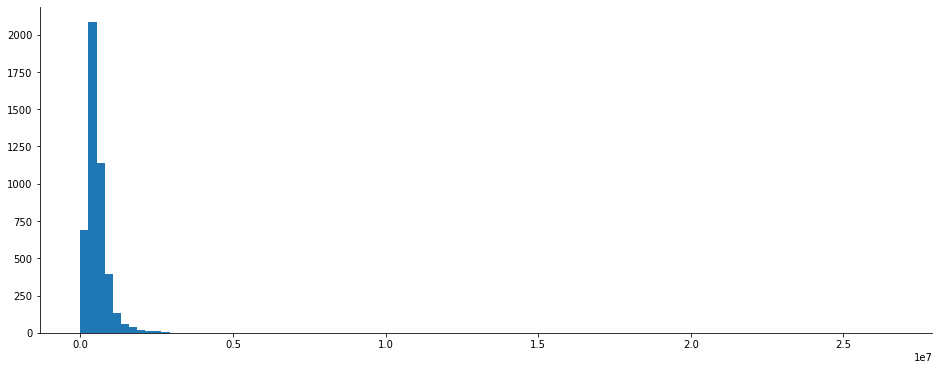

In [6]:
# Visualize price

import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 6)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
plt.hist(df['price'], bins=100);

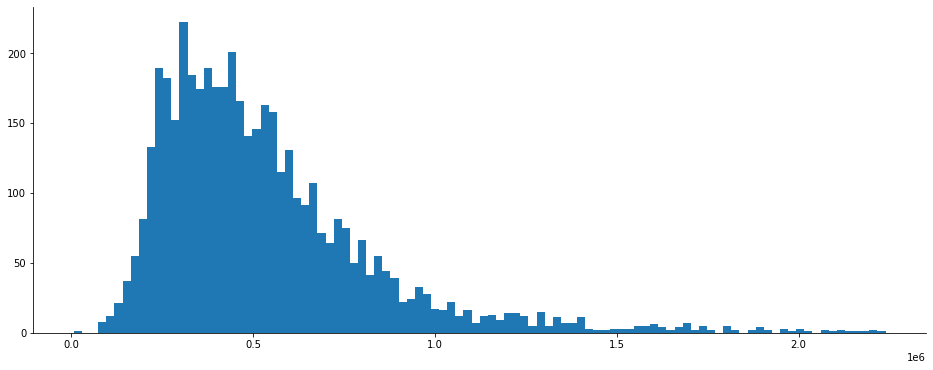

In [7]:
# use Z score(remove data outside of 3 std away) to eliminate outliers (or use IQR)

from scipy import stats
# Calculate Z-values
df['price_z'] = np.abs(stats.zscore(df['price']))
# Filter out outliers
df = df[df['price_z'] <= 3]
# Remove houses listed for $0
df = df[df['price'] != 0]
# Drop the column
df = df.drop('price_z', axis=1)
# Draw a histogram
plt.hist(df['price'], bins=100);

In [8]:
# look for non numeric data
df.sample(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,city,house_age,was_renovated,was_renovated_10_yrs,was_renovated_30_yrs
1027,879950.0,4.0,2.25,3500,13875,1.0,0,4,4,1830,1670,Seattle,83,0,0,0
1513,306000.0,3.0,2.50,1680,11193,2.0,0,0,3,1680,0,Renton,37,0,0,0
3862,723000.0,4.0,2.25,2430,4748,1.5,0,0,3,1630,800,Seattle,93,1,0,0
3126,471001.0,3.0,1.75,1800,6000,1.0,0,0,5,900,900,Seattle,116,0,0,0
2921,660000.0,4.0,3.25,3030,9273,2.0,0,0,5,3030,0,Issaquah,33,0,0,0


# *NN dont work well with extreame outliers and unscaled data*

In [1]:
# scale and OHE 

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
transformer = make_column_transformer(
    (MinMaxScaler(), 
        ['sqft_living', 'sqft_lot','sqft_above', 
         'sqft_basement', 'house_age']),
    (OneHotEncoder(handle_unknown='ignore'), 
        ['bedrooms', 'bathrooms', 'floors', 
         'view', 'condition'])
)

In [10]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# Fit
transformer.fit(X_train)
# Apply the transformation
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)

In [12]:
X_train

<3613x53 sparse matrix of type '<class 'numpy.float64'>'
	with 33918 stored elements in Compressed Sparse Row format>

In [13]:
# transform sparse matrices to array
X_train = X_train.toarray()
X_test = X_test.toarray()

# *Building the model NN*

In [14]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

In [15]:
# How to track the LOSS of the model:
def rmse(y_true, y_pred):    
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [4]:
!pip install --upgrade numpy

     |████████████████████████████████| 17.6 MB 861 kB/s eta 0:00:01     |███████████████████████▏        | 12.8 MB 939 kB/s eta 0:00:06
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.3 which is incompatible.


In [16]:
tf.random.set_seed(42)
model = Sequential([
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1)
])
model.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)
model.fit(X_train, y_train, epochs=100)


Metal device set to: Apple M1 Pro
Epoch 1/100


2022-05-17 00:01:44.769663: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-17 00:01:44.769877: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-05-17 00:01:44.880702: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-17 00:01:45.474375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


113/113 [==============================] - 3s 8ms/step - loss: 607383.2500 - rmse: 607402.7500
Epoch 2/100
113/113 [==============================] - 1s 5ms/step - loss: 432147.9688 - rmse: 431962.5625
Epoch 3/100
113/113 [==============================] - 1s 5ms/step - loss: 269250.8438 - rmse: 269225.5938
Epoch 4/100
113/113 [==============================] - 1s 5ms/step - loss: 249562.5781 - rmse: 249502.7500
Epoch 5/100
113/113 [==============================] - 1s 6ms/step - loss: 239587.7344 - rmse: 239654.7656
Epoch 6/100
113/113 [==============================] - 1s 6ms/step - loss: 231224.1250 - rmse: 231173.8594
Epoch 7/100
113/113 [==============================] - 1s 5ms/step - loss: 227458.7500 - rmse: 227426.3906
Epoch 8/100
113/113 [==============================] - 1s 5ms/step - loss: 222963.3281 - rmse: 222993.2500
Epoch 9/100
113/113 [==============================] - 1s 5ms/step - loss: 219009.9688 - rmse: 218953.5156
Epoch 10/100
113/113 [===========================

In [1]:
predictions = model.predict(X_test)
predictions[:5]

NameError: name 'model' is not defined

In [2]:
predictions = np.ravel(predictions)
predictions[:5]

NameError: name 'np' is not defined

In [3]:
rmse(y_test, predictions).numpy()

NameError: name 'rmse' is not defined